In [6]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv('C:/workfiles/denver-crime-data/crime.csv')

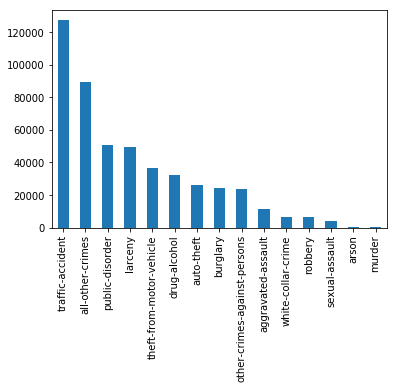

In [8]:
df['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')

In [9]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [10]:
df1 = df.drop(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'INCIDENT_ADDRESS', 
               'IS_CRIME', 'IS_TRAFFIC','LAST_OCCURRENCE_DATE','NEIGHBORHOOD_ID','OFFENSE_TYPE_ID', 'GEO_X', 'GEO_Y', 
               'REPORTED_DATE', 'FIRST_OCCURRENCE_DATE',], axis= 1)
df1.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID
0,all-other-crimes,-104.809881,39.773188,5,521
1,larceny,-104.781434,39.785649,5,522
2,theft-from-motor-vehicle,-104.957381,39.663490,3,314
3,larceny,-104.941440,39.702698,3,312
4,larceny,-104.955370,39.717107,3,311


In [11]:
df1.dtypes

OFFENSE_CATEGORY_ID     object
GEO_LON                float64
GEO_LAT                float64
DISTRICT_ID              int64
PRECINCT_ID              int64
dtype: object

In [12]:
#df1.REPORTED_DATE = pd.to_datetime(df1.REPORTED_DATE, format='%m/%d/%Y %H:%M:%S %p')
df1.dtypes

OFFENSE_CATEGORY_ID     object
GEO_LON                float64
GEO_LAT                float64
DISTRICT_ID              int64
PRECINCT_ID              int64
dtype: object

In [13]:
#df1.to_csv(r'C:/workfiles/denver-crime-data/clean_crime.csv')

In [14]:
df1.count()

OFFENSE_CATEGORY_ID    488283
GEO_LON                484260
GEO_LAT                484260
DISTRICT_ID            488283
PRECINCT_ID            488283
dtype: int64

In [15]:
df1.count() - 488283

OFFENSE_CATEGORY_ID       0
GEO_LON               -4023
GEO_LAT               -4023
DISTRICT_ID               0
PRECINCT_ID               0
dtype: int64

In [16]:
df1 = df1.dropna(axis=0, how='any')
df1.count()

OFFENSE_CATEGORY_ID    484260
GEO_LON                484260
GEO_LAT                484260
DISTRICT_ID            484260
PRECINCT_ID            484260
dtype: int64

In [17]:
df1 = df1[df.OFFENSE_CATEGORY_ID != 'all-other-crimes']
df1.count()

c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


OFFENSE_CATEGORY_ID    395160
GEO_LON                395160
GEO_LAT                395160
DISTRICT_ID            395160
PRECINCT_ID            395160
dtype: int64

In [18]:
df1 = df1[df.OFFENSE_CATEGORY_ID != 'traffic-accident']
df1.count()

c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


OFFENSE_CATEGORY_ID    268034
GEO_LON                268034
GEO_LAT                268034
DISTRICT_ID            268034
PRECINCT_ID            268034
dtype: int64

In [19]:
df1 = df1[df.OFFENSE_CATEGORY_ID != 'sexual-assault']
df1.count()

c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


OFFENSE_CATEGORY_ID    268033
GEO_LON                268033
GEO_LAT                268033
DISTRICT_ID            268033
PRECINCT_ID            268033
dtype: int64

In [20]:
df1.describe()

,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID
count,268033.000000,268033.000000,268033.000000,268033.000000
mean,-104.949962,39.726484,3.585223,376.153332
std,1.166716,0.442662,1.772671,178.046990
min,-105.232477,0.000001,1.000000,111.000000
25%,-105.007439,39.704964,2.000000,221.000000
50%,-104.981446,39.739773,3.000000,323.000000
75%,-104.924322,39.757169,5.000000,522.000000
max,-0.000002,39.895109,7.000000,759.000000


In [21]:
df1.head(4)

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID
1,larceny,-104.781434,39.785649,5,522
2,theft-from-motor-vehicle,-104.957381,39.663490,3,314
3,larceny,-104.941440,39.702698,3,312
4,larceny,-104.955370,39.717107,3,311


In [22]:
df1 = df1.loc[df1['OFFENSE_CATEGORY_ID'].isin(['white-collar-crime','robbery'])]
df1.count()

OFFENSE_CATEGORY_ID    12876
GEO_LON                12876
GEO_LAT                12876
DISTRICT_ID            12876
PRECINCT_ID            12876
dtype: int64

In [23]:
#import pandas as pd, numpy as np, matplotlib.pyplot as plt
####from sklearn.cluster import DBSCAN
###from geopy.distance import great_circle
##from shapely.geometry import MultiPoint
#df = pd.read_csv('summer-travel-gps-full.csv')
#coords = df.as_matrix(columns=['lat', 'lon'])
#
#kms_per_radian = 6371.0088
#epsilon = 1.5 / kms_per_radian
#db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
#cluster_labels = db.labels_
#num_clusters = len(set(cluster_labels))
#clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
#print('Number of clusters: {}'.format(num_clusters))
#
#def get_centermost_point(cluster):
#    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
#    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
#    return tuple(centermost_point)
#centermost_points = clusters.map(get_centermost_point)
#
#lats, lons = zip(*centermost_points)
#rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
#
#rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) &amp;&amp; (df['lon']==row['lon'])].iloc[0], axis=1)
#
##fig, ax = plt.subplots(figsize=[10, 6])
##rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
#df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
##ax.set_title('Full data set vs DBSCAN reduced set')
##ax.set_xlabel('Longitude')
##ax.set_ylabel('Latitude')
##ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
##plt.show()

In [24]:
#import numpy as np
#import pandas as pd
dataset = df1

In [25]:
dataset.groupby('OFFENSE_CATEGORY_ID').size()

OFFENSE_CATEGORY_ID
robbery               6316
white-collar-crime    6560
dtype: int64

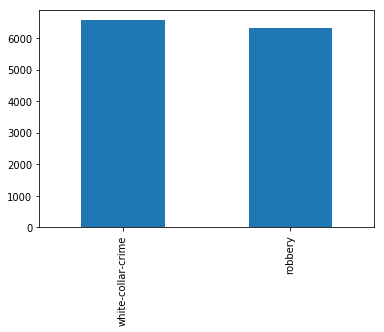

In [26]:
df1['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')

In [27]:
feature_columns = ['GEO_LON','GEO_LAT','DISTRICT_ID','PRECINCT_ID']
X = dataset[feature_columns].values
y = dataset['OFFENSE_CATEGORY_ID'].values

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

c:\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


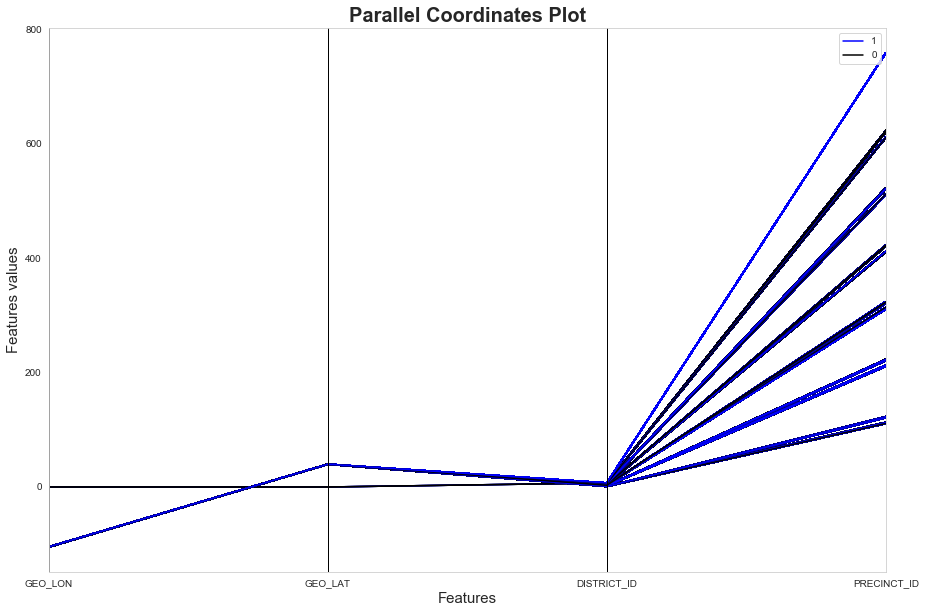

In [58]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
dataset['ID'] = np.arange(len(dataset))
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("ID", axis=1), "OFFENSE_CATEGORY_ID", color = ['blue', 'black'])
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
#plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

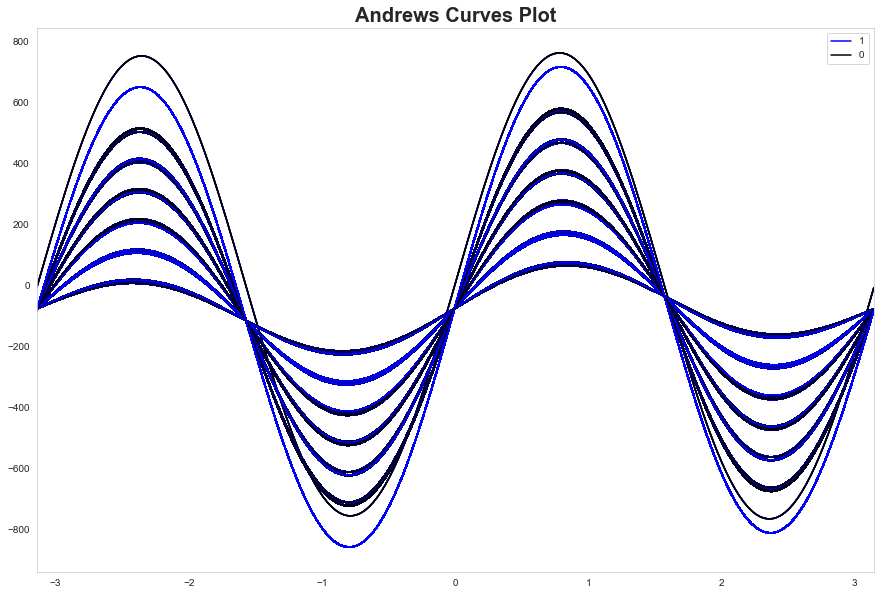

In [59]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("ID", axis=1), "OFFENSE_CATEGORY_ID", color = ['blue', 'black'])
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
#plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

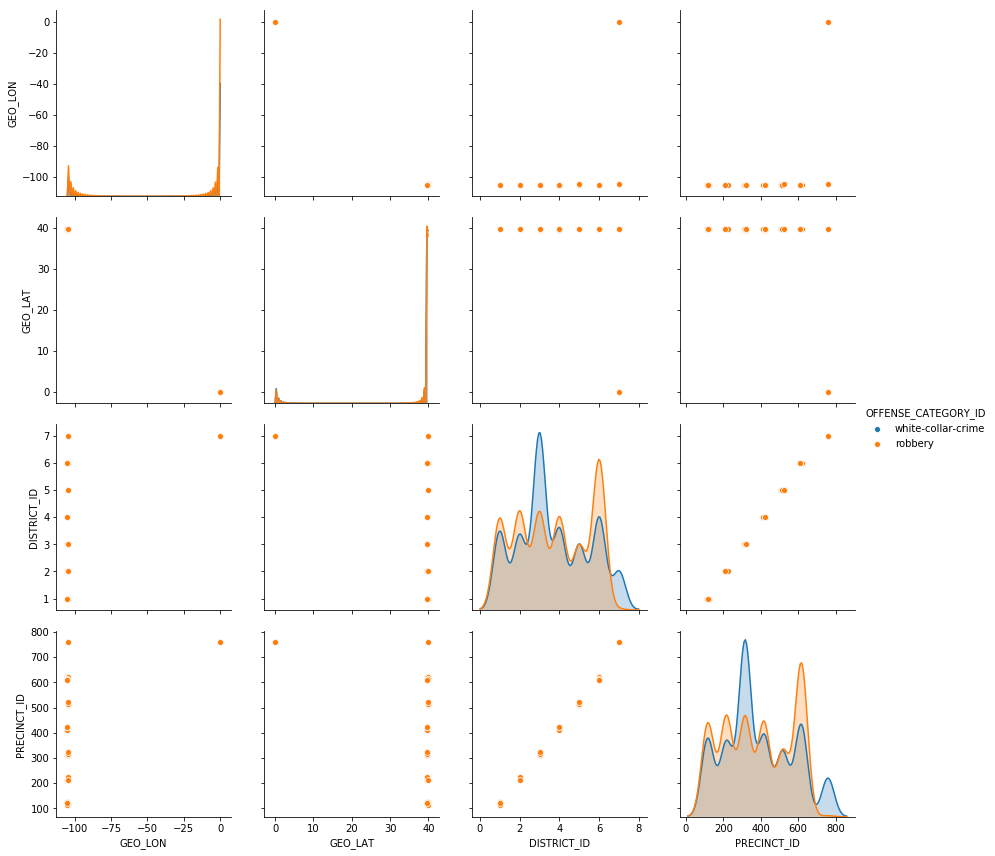

In [32]:
plt.figure()
sns.pairplot(dataset.drop("ID", axis=1), hue = "OFFENSE_CATEGORY_ID", height=3)#,markers=["o", "s", "D"]
plt.show()

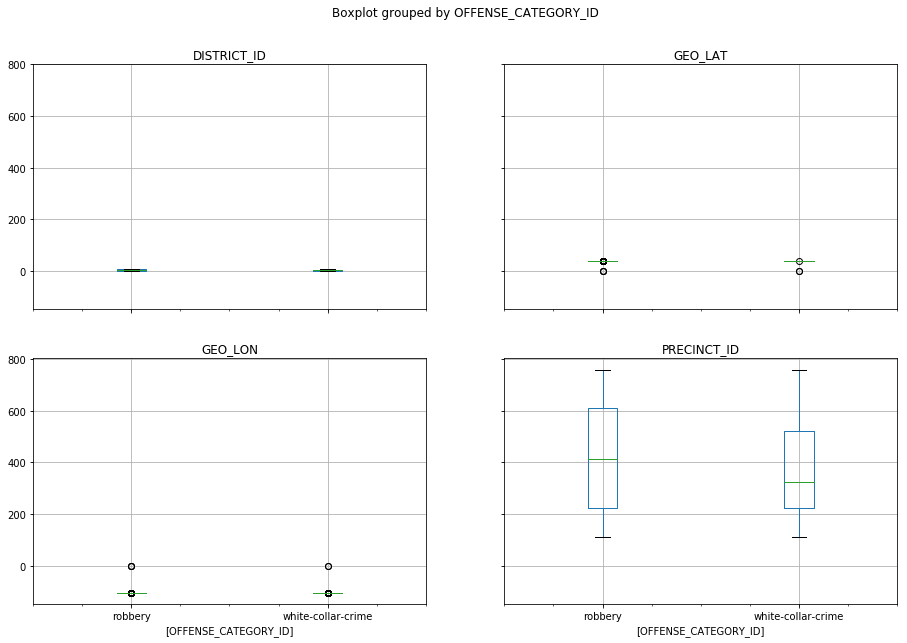

In [33]:
plt.figure()
dataset.drop("ID", axis=1).boxplot(by="OFFENSE_CATEGORY_ID", figsize=(15, 10))
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[826, 437],
       [457, 856]], dtype=int64)

In [36]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 65.3 %.


In [37]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

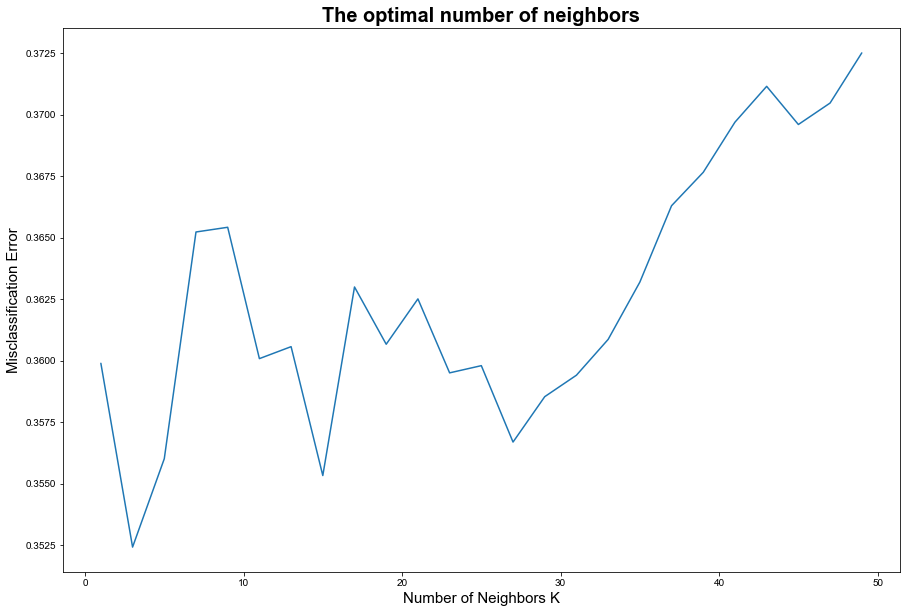

In [38]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [39]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of clusters is %d." % best_k)

The optimal number of clusters is 3.


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df1['OFFENSE_CATEGORY_ID']= label_encoder.fit_transform(df1['OFFENSE_CATEGORY_ID']) 
  
df1['OFFENSE_CATEGORY_ID'].unique()

df1 = df1.drop(['OFFENSE_CATEGORY_ID','ID'], axis=1)#

df1.head()

In [41]:
#df1 = df1.drop(['ID'], axis=1)#'OFFENSE_CATEGORY_ID'
df1.head()

KeyError: "['ID'] not found in axis"

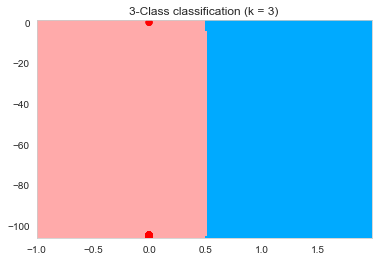

In [54]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

# import some data to play with

# prepare data
X = df1.iloc[:, :2]
y = df1.OFFENSE_CATEGORY_ID
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [55]:
df1.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID
18,1,-104.980747,39.701835,3,312
25,1,-104.901787,39.652260,3,324
72,0,-104.999219,39.733952,1,123
101,0,-104.958432,39.698094,3,312
144,0,-104.887577,39.739848,2,223
